In [1]:
import torch
from torch.autograd import Variable
from table_generator.lib.io import load_point_clouds, write_point_cloud
from table_generator.lib.auto_encoder import Encoder, Decoder, AutoEncoder
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
encoder = Encoder()
encoder.load_state_dict(torch.load('./table_generator/models/encoder.pt', map_location={'cuda:0': 'cpu'}))

In [4]:
decoder = Decoder()
decoder.load_state_dict(torch.load('./table_generator/models/decoder.pt', map_location={'cuda:0': 'cpu'}))

In [82]:
index_list = range(20)
point_clouds = load_point_clouds(index_list, directory='./table_generator/data/04379243')

In [83]:
# for p in point_clouds:
#     print(p.shape)
#     break
latent_vector = encoder(point_clouds)
# latent_vector = latent_vector.reshape(-1, 32)
latent_vector.shape

torch.Size([20, 32, 1])

In [96]:
index_1, index_2 = 10, 8
ratio_1 = 0.5
ratio_2 = 1.0 - ratio_1
merged = latent_vector[index_1,:,:] * ratio_1 + latent_vector[index_2,:,:] * ratio_2
merged = merged.reshape([1, -1, 1])
merged.shape

torch.Size([1, 32, 1])

In [97]:
output = decoder(merged)
output.shape

torch.Size([1, 3, 2048])

In [98]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

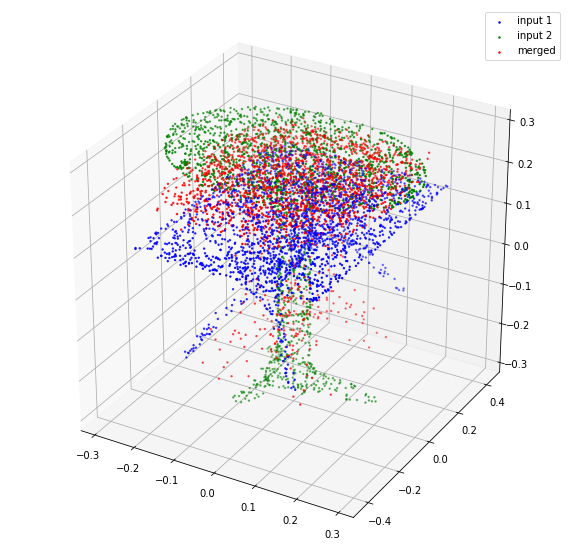

In [99]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

data = point_clouds[index_1,:,:].detach().numpy()
ax.scatter(data[0], data[1], data[2], zdir='z', s=2, c='b', label='input 1')

data = point_clouds[index_2,:,:].detach().numpy()
ax.scatter(data[0], data[1], data[2], zdir='z', s=2, c='g', label='input 2')

data = output[0].detach().numpy()
ax.scatter(data[0], data[1], data[2], zdir='z', s=2, c='r', label='merged')

ax.legend()
fig.show()